In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
path = '/Users/clementchausserie-lapree/code/Clement-CL/bulber/data/'

In [3]:
df = pd.read_csv(f'{path}bumbulb_img_v2.csv')

In [4]:
df.image_title[0]

'Acanthus mollis_flower_img_1'

# Would focusing on shape have better results?

In [5]:
rgb = Image.open(f'{path}images/images_originals/{df.image_title[100]}.jpg')
img = np.mean(rgb, axis=2)

rgb_2 = Image.open(f'{path}images/images_originals/{df.image_title[20000]}.jpg')
img_2 = np.mean(rgb_2, axis=2)

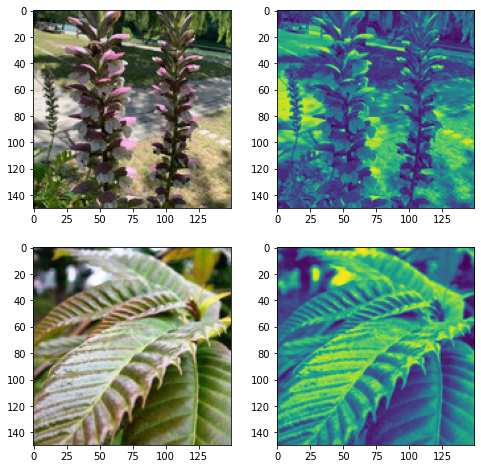

In [6]:
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(rgb)
fig.add_subplot(rows, columns, 2)
plt.imshow(img)
fig.add_subplot(rows, columns, 3)
plt.imshow(rgb_2)
fig.add_subplot(rows, columns, 4)
plt.imshow(img_2)

# Reducing the dataset to have more balanced data instead of augmenting?

In [7]:
df_aug = pd.read_csv(f'{path}image_augmented.csv')

In [8]:
df

,family,genus,species,angle,image_url,image_title
0,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/978e3d2fbd442...,Acanthus mollis_flower_img_1
1,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/4d395bba95a16...,Acanthus mollis_flower_img_2
2,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/c3574b6ac407b...,Acanthus mollis_flower_img_3
3,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/781bb2a2b3eab...,Acanthus mollis_flower_img_4
4,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/f27971f9f316a...,Acanthus mollis_flower_img_5
...,...,...,...,...,...,...
62032,Woodsiaceae,Athyrium,Athyrium filix-femina,other,https://bs.floristic.org/image/s/b03b1674bc7c8...,Athyrium filix-femina_other_img_12
62033,Woodsiaceae,Athyrium,Athyrium filix-femina,other,https://bs.floristic.org/image/s/a0188959e7d0d...,Athyrium filix-femina_other_img_13
62034,Woodsiaceae,Athyrium,Athyrium filix-femina,other,https://bs.floristic.org/image/s/beab2354ac3c3...,Athyrium filix-femina_other_img_14
62035,Woodsiaceae,Athyrium,Athyrium filix-femina,other,https://bs.floristic.org/image/s/fcbb7504f8d5f...,Athyrium filix-femina_other_img_15


In [9]:
df.species.unique()

array(['Acanthus mollis', 'Carpobrotus edulis',
       'Alisma plantago-aquatica', 'Begonia evansiana', 'Cistus albidus',
       'Bryonia cretica', 'Arbutus unedo', 'Castanea sativa',
       'Centaurium erythraea', 'Gunnera tinctoria', 'Deutzia scabra',
       'Hypericum androsaemum', 'Crocosmia x crocosmiiflora',
       'Lilium bulbiferum', 'Lagerstroemia indica',
       'Magnolia grandiflora', 'Eucalyptus globulus', 'Nelumbo nucifera',
       'Bougainvillea spectabilis', 'Nymphaea alba',
       'Anacamptis pyramidalis', 'Antirrhinum majus',
       'Argentina anserina', 'Brugmansia suaveolens',
       'Athyrium filix-femina'], dtype=object)

In [10]:
species_count = df.groupby('species').count()

In [11]:
species_count['reduce_by'] = species_count.family - 1500

In [12]:
species_count.reduce_by['Acanthus mollis']

3646

In [13]:
species_to_reduce = species_count.index[species_count.family >= 1500]

In [14]:
species_to_reduce

Index(['Acanthus mollis', 'Anacamptis pyramidalis', 'Antirrhinum majus',
       'Arbutus unedo', 'Argentina anserina', 'Bougainvillea spectabilis',
       'Brugmansia suaveolens', 'Bryonia cretica', 'Carpobrotus edulis',
       'Castanea sativa', 'Centaurium erythraea', 'Cistus albidus',
       'Crocosmia x crocosmiiflora', 'Deutzia scabra', 'Hypericum androsaemum',
       'Lagerstroemia indica', 'Lilium bulbiferum', 'Magnolia grandiflora'],
      dtype='object', name='species')

## randomly select 1500 rows in species to reduce

In [15]:
len(df.loc[df.species == 'Acanthus mollis'].sample(species_count.reduce_by['Acanthus mollis']).index)

3646

In [16]:
# df_new = df.drop(df.loc[df.species == 'Acanthus mollis'].sample(species_count.reduce_by['Acanthus mollis']).index, axis=0)

In [17]:
# df_new.loc[df_new.species == 'Acanthus mollis']

In [18]:
for species in species_to_reduce:
    df = df.drop(df.loc[df.species == species].sample(species_count.reduce_by[species]).index, axis=0)


In [21]:
df.groupby('species').count()

,family,genus,angle,image_url,image_title
species,,,,,
Acanthus mollis,1500,1500,1500,1500,1500
Alisma plantago-aquatica,606,606,606,606,606
Anacamptis pyramidalis,1500,1500,1500,1500,1500
Antirrhinum majus,1500,1500,1500,1500,1500
Arbutus unedo,1500,1500,1500,1500,1500
Argentina anserina,1500,1500,1500,1500,1500
Athyrium filix-femina,1333,1333,1333,1333,1333
Begonia evansiana,719,719,719,719,719
Bougainvillea spectabilis,1500,1500,1500,1500,1500


In [22]:
df.to_csv(f'{path}balanced_images.csv')

In [23]:
test = pd.read_csv(f'{path}balanced_images.csv')

In [24]:
test

,Unnamed: 0,family,genus,species,angle,image_url,image_title
0,3,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/781bb2a2b3eab...,Acanthus mollis_flower_img_4
1,5,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/5c210bb865c97...,Acanthus mollis_flower_img_6
2,8,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/03615e5ed3b77...,Acanthus mollis_flower_img_9
3,11,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/2566137ba01f8...,Acanthus mollis_flower_img_12
4,13,Acanthaceae,Acanthus,Acanthus mollis,flower,https://bs.floristic.org/image/s/172bbc77a8bc5...,Acanthus mollis_flower_img_14
...,...,...,...,...,...,...,...
33100,62032,Woodsiaceae,Athyrium,Athyrium filix-femina,other,https://bs.floristic.org/image/s/b03b1674bc7c8...,Athyrium filix-femina_other_img_12
33101,62033,Woodsiaceae,Athyrium,Athyrium filix-femina,other,https://bs.floristic.org/image/s/a0188959e7d0d...,Athyrium filix-femina_other_img_13
33102,62034,Woodsiaceae,Athyrium,Athyrium filix-femina,other,https://bs.floristic.org/image/s/beab2354ac3c3...,Athyrium filix-femina_other_img_14
33103,62035,Woodsiaceae,Athyrium,Athyrium filix-femina,other,https://bs.floristic.org/image/s/fcbb7504f8d5f...,Athyrium filix-femina_other_img_15
